## Regresión lineal simple con Python
### El paquete stastmodel para regresión lineal

In [56]:
import numpy as np
import pandas as pd
import os


In [57]:
mainpath="/Volumes/Developer/Study/Udemy/Machine Learning/python-ml-course/datasets"
filename="ads/Advertising.csv"
fullpath= os.path.join(mainpath, filename)

In [58]:
data = pd.read_csv(fullpath)

In [59]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
import statsmodels.formula.api as smf

In [61]:
lm = smf.ols(formula="Sales~TV", data=data).fit()

In [62]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo seria 
Sales = 7.032594 + 0.047537 * TV

In [63]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

R2 = lm.rsquared Para hallar el coeficiente de correlación

In [64]:
lm.rsquared, lm.rsquared_adj

(0.611875050850071, 0.6099148238341623)

In [65]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        17:42:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
sales_pred = lm.predict(data["TV"])
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [69]:
import matplotlib.pyplot as plt

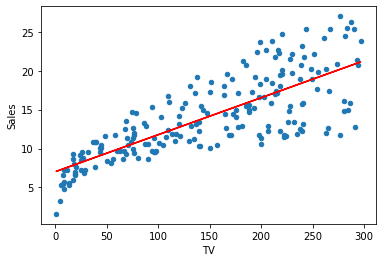

In [75]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV" , y= "Sales")
plt.plot(data["TV"], sales_pred, c="red")

In [76]:
data['sales_pred']= 7.032594 + 0.047537 * data["TV"]

In [77]:
data['RSE'] = (data["Sales"]-data["sales_pred"])**2

In [81]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [82]:
RSE=np.sqrt(SSD / (len(data)-2))
RSE

3.258656369238098

In [83]:
sales_m = np.mean(data['Sales'])
sales_m

14.022500000000003

In [84]:
error = RSE / sales_m
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

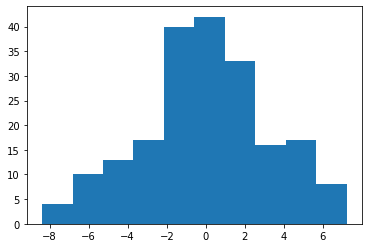

In [85]:
plt.hist(data["Sales"]-data["sales_pred"])

## Regresión lineal multiple en Python

### El paquete stastmodel para regresión multiple

In [86]:
#Añadimos el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data= data).fit()

In [87]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [88]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.95e-45
Time:                        18:12:28   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales= 5.774948 + 0.046901*TV + 0.044219 * Newspaper

In [89]:
sales_pred= lm2.predict(data[['TV', 'Newspaper']])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [91]:
SSD  = sum((data['Sales']-sales_pred)**2)
SSD

1918.561811896827

In [92]:
RSE= np.sqrt(SSD / (len(data)-2-1))
RSE

3.120719860252885

In [93]:
error = RSE / sales_m
error

0.22255089037282116

In [94]:
lm3 = smf.ols(formula="Sales~TV+Radio", data= data).fit()

In [95]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           4.83e-98
Time:                        18:20:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
sales_pred= lm3.predict(data[['TV', 'Radio']])
SSD  = sum((data['Sales']-sales_pred)**2)
SSD


556.9139800676182

In [98]:
RSE= np.sqrt(SSD / (len(data)-2-1))
RSE

1.681360912508001

In [99]:
error = RSE / sales_m
error

0.11990450436855059

In [100]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data= data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        18:24:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
sales_pred= lm3.predict(data[['TV', 'Radio', "Newspaper"]])
SSD  = sum((data['Sales']-sales_pred)**2)
SSD

556.9139800676182

In [104]:
RSE= np.sqrt(SSD / (len(data)-2-1))
RSE

1.681360912508001

In [103]:
error = RSE / sales_m
error

0.12020999404676898

### Multicolinealidad

Factor de inflacion de la varianza
* VIF = 1 : las variables no estan correlacionadas
* VIF <5 : las variables tienen una correlacion moderada y se pueden quedar en el modelo
* VIF >5 : las variables estan altamente correlacionadas y deben desaparecer del modelo

In [106]:
#Newspaper ~ TV + Radio ->R2 VIF = 1 / (1-R2)
lm_n = smf.ols(formula= "Newspaper~TV+Radio", data=data).fit()
rsquared_n = lm_n.rsquared
VIF= 1 / (1-rsquared_n)
VIF

1.1451873787239288

In [111]:
#TV ~ Newspaper + Radio ->R2 VIF = 1 / (1-R2)
lm_tv = smf.ols(formula= "TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF= 1 / (1-rsquared_tv)
VIF

1.0046107849396502

In [112]:
#Radio ~ TV + Newspaper ->R2 VIF = 1 / (1-R2)
lm_radio = smf.ols(formula= "Radio~TV+Newspaper", data=data).fit()
rsquared_radio = lm_radio.rsquared
VIF= 1 / (1-rsquared_radio)
VIF

1.1449519171055353